In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [34]:
runs = 10000
steps = 1000
bandits = 10
epsilon = .1
c = 2

In [35]:
q = np.zeros(bandits) # true values
results = np.zeros([2,runs,steps-1])
optimal = np.zeros([2,runs,steps-1])

In [36]:
for i in range(bandits):
    q[i] = np.random.normal(0,1)

In [37]:
for l in range(2):
    for k in range(runs):
        R = np.zeros([steps,bandits]) # actual rewards
        gained_reward = np.zeros(steps-1) # gained reward in each step
        A = np.zeros(steps) # selected actions
        opt = np.zeros(steps-1) # percentage of optimal choice
        Q = np.zeros(bandits) # value
        UCB = np.zeros(bandits)
        counts = np.zeros(bandits) # counts of numbers each bandit was selected
        for j in range(steps-1):
            if np.random.rand() < epsilon:
                if l==0:
                    for m in range(bandits):
                        if counts[m] == 0:
                            UCB[m] = 100
                        else:
                            UCB[m] = Q[m] + c*np.log(j+1)/counts[m]
                    A[j] = np.argmax(UCB)
                else:
                    A[j] = np.random.randint(bandits)
            else:
                index = np.where(Q == np.amax(Q))
                A[j] = random.choice(index[0])
            idx = A[j].astype(int)
            counts[idx] = counts[idx] + 1
            R[j,idx] = np.random.normal(q[idx],1)
            gained_reward[j] = R[j,idx]
            Q[idx] = Q[idx] + (1/counts[idx]) * (R[j,idx] - Q[idx])
            if idx == np.argmax(q): #np.where(q == np.amax(q))[0][0]:
                opt[j] = 100
        results[l,k,] = np.cumsum(gained_reward)/np.arange(1,steps)
        optimal[l,k,] = np.cumsum(opt)/np.arange(1,steps)

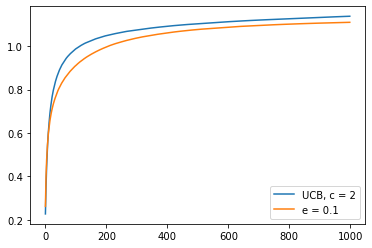

In [38]:
plt.plot(range(steps-1), np.mean(results[0],0), label = 'UCB, c = 2')
plt.plot(range(steps-1), np.mean(results[1],0), label = 'e = 0.1')
plt.legend()

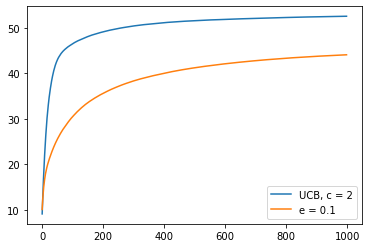

In [39]:
plt.plot(range(steps-1), np.mean(optimal[0],0), label = 'UCB, c = 2')
plt.plot(range(steps-1), np.mean(optimal[1],0), label = 'e = 0.1')
plt.legend()